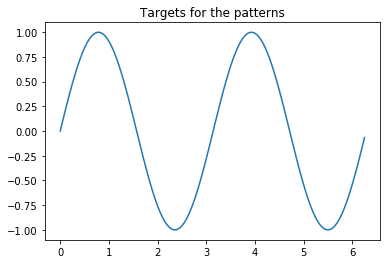

klar


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math,random
np.random.seed(42)
"""Generate data"""
trainSet = np.arange(0, 2*np.pi, 0.1)#List of [0, 6.2]. 63 elements
testSet = np.arange(0.05, 2*np.pi, 0.1) #List of [0.05, 6.25]. 63 elements

trainTargetSin = np.sin(2*trainSet)
#trainTargetSin += np.random.normal(0,math.sqrt(0.1),trainTargetSin.shape[0]) #Add noise
testTargetSin = np.sin(2*testSet)
#testTargetSin += np.random.normal(0,math.sqrt(0.1),testTargetSin.shape[0]) #Add noise

#Plot to visualize
plotSin = np.stack((trainTargetSin, testTargetSin), axis=1).flatten()
plotX = np.stack((trainSet, testSet), axis=1).flatten()
plt.plot(plotX, plotSin)
plt.title("Targets for the patterns")
plt.show()
print("klar")

In [38]:
class DeltaRule:
    def __init__(self, train, trainTarget, prototypes, step=0.01, maxEpoch=200):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.step = step
        self.beta = np.ones(self.prototypes.size) #Variance - now set to equal for all
        self.weights = np.ones(self.prototypes.size)
        self.epoch = 0
        self.maxEpoch = maxEpoch
        self.errThreshold = 0.1
        self.mainLoop()
        
    def mainLoop(self):
        erors = []
        while self.epoch < self.maxEpoch:
            for j in range(self.train.size):
                #i next int
                i = random.randint(0,self.train.size-1) 
                self.weights += self.deltaWeights(i)
                if self.residualError(self.train, self.trainTarget) < self.errThreshold:
                    return
            self.epoch += 1
            #if self.epoch%20 == 0:
            plt.plot(self.epoch, self.residualError(self.train, self.trainTarget),marker="o", color="b")
        plt.show()
            
            
    def deltaWeights(self, index):
        #a - Kanske upphöjt till två?
        activations = self.activation(self.train[index])
        a = self.trainTarget[index] - np.dot(activations, self.weights) 
        b = self.step * a
        delta_w = b * self.activation(self.train[index])
        
        return delta_w
    
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        activations = np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2)) 
        
        #3 vikter ska uppdateras        
        #1a
        bestActivationIndex1 = np.argmax(activations)
        activations[bestActivationIndex1]=0
        
        #2a
        bestActivationIndex2 = np.argmax(activations)
        activations[bestActivationIndex2]=0
        
        #3a
        bestActivationIndex3 = np.argmax(activations)
        activations[bestActivationIndex3]=0
        
        #4e
        bestActivationIndex4 = np.argmax(activations)
        activations[bestActivationIndex4]=0
        
        #5e
        bestActivationIndex5 = np.argmax(activations)
        activations[bestActivationIndex5]=0
        
        activations = np.zeros_like(activations)
        activations[bestActivationIndex1]=1
        activations[bestActivationIndex2]=0.8
        activations[bestActivationIndex3]=0.6
        activations[bestActivationIndex4]=0.4
        activations[bestActivationIndex5]=0.2
        return activations
    
    def activation_old(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        activations = np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2)) 
        #Set biggest activation to 1
        #Endast EN weight ska uppdateras
        bestActivationIndex = np.argmax(activations)
        activations = np.zeros_like(activations)
        activations[bestActivationIndex]=1
        
        return activations
        
    #Predict
    def run(self, patterns):
        res = np.zeros(patterns.size)
        c = 0
        for x in patterns:
            res[c] = sum(np.multiply(self.weights, self.activation(x)))
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)
    

In [4]:
#trainSet

In [40]:
index = np.linspace(0, trainSet.size-1, num = 29, dtype= int)
b = DeltaRule(trainSet, trainTargetSin, trainSet[index], 0.01, 100)

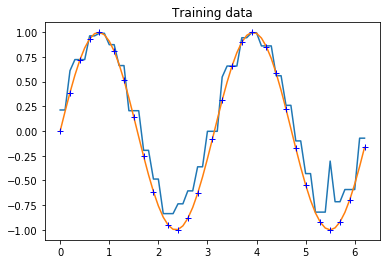

Residual error:  0.135347622528


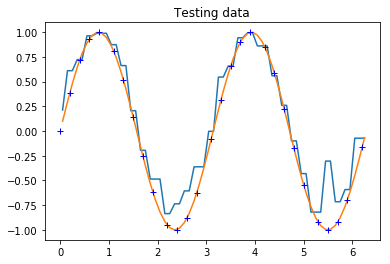

Residual error:  0.139406836008


In [30]:
plt.plot(trainSet, b.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Training data")
plt.show()
print("Residual error: ", b.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, b.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", b.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error


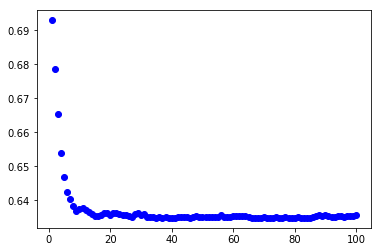

1   -   0.635612009866   -   0.635879128257


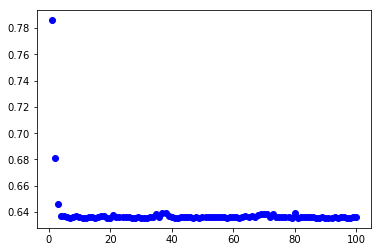

2   -   0.636427223578   -   0.637855640572


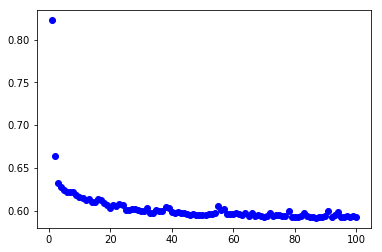

3   -   0.592729360493   -   0.590575726337


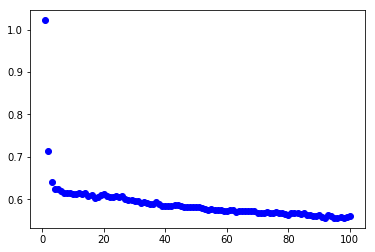

4   -   0.560082109761   -   0.550950861576


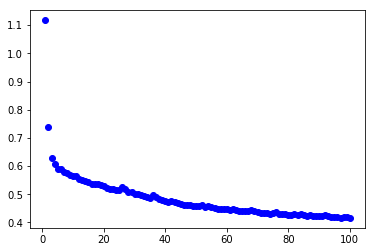

5   -   0.415978411692   -   0.417113323478


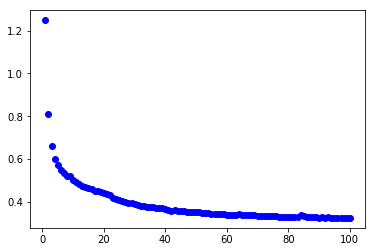

6   -   0.325276406069   -   0.325062580917


KeyboardInterrupt: 

In [5]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    dr = DeltaRule(trainSet, trainTargetSin, trainSet[index], 0.01, 100)
    print(i, "  -  ", dr.residualError(trainSet, trainTargetSin), "  -  ", dr.residualError(testSet, testTargetSin))
     

In [ ]:
#SIN

In [ ]:
"""Checking training data error for 10 nodes"""
index = np.linspace(0, trainSet.size-1, num = 10, dtype= int)
a = LeastSquares(trainSet, trainTargetSin, trainSet[index])
plt.plot(trainSet, a.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Training data")
plt.show()
print("Residual error: ", a.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, a.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSin))

In [ ]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[index])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))
        

In [ ]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are clustered from index 0 and forward"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[0:i])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))